In [1]:
#importing the library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Reading The Data ##

In [2]:
data1 = pd.read_csv(r"C:\Users\sa200\Desktop\Sakshi\code\iitkcourse\vgsales.csv")

In [3]:
data1.head(20) #first 20 enteries in the dataset

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


## Analysing the Dataset ##

In [4]:
#name of the columns from the data
data1.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
#shape of the data
data1.shape

(16598, 11)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
data1.describe() #statistical description of the data

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
# checking for null value
data1.isnull()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


## Preprocessing ##

<function matplotlib.pyplot.show(close=None, block=None)>

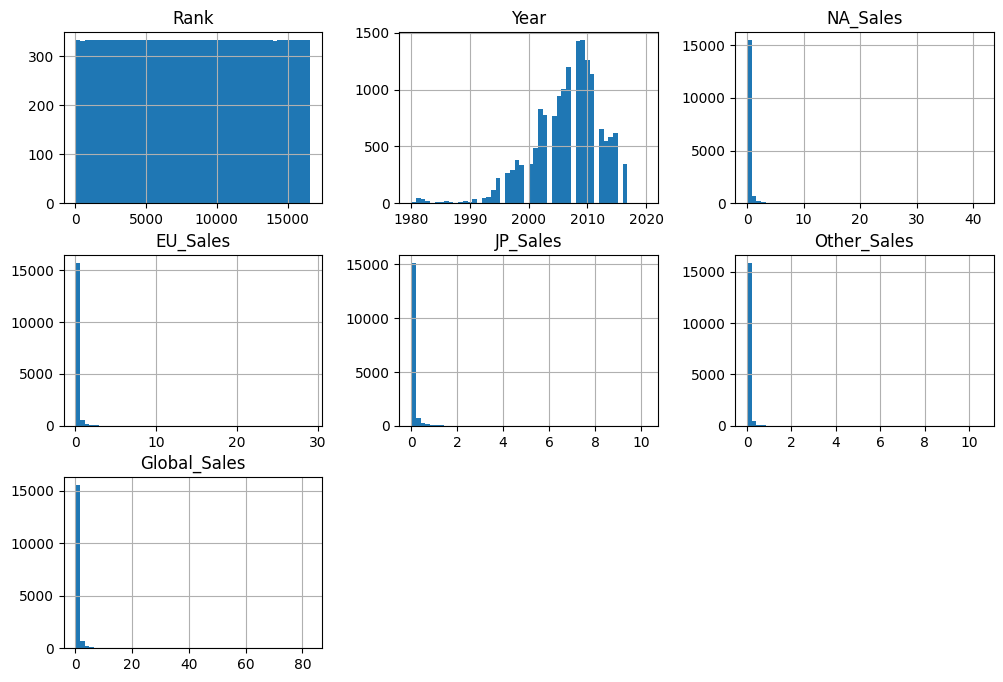

In [9]:
data1.hist(bins=50,figsize=(12,8))
plt.show

In [10]:
#looking from the graphs, all the sales are almost similar in all the above countries so we can consider only global sales as the target

In [11]:
# seeing if there is some null value in our final dataset
data1.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [12]:
#as we have enough rows to train and test the data we will just drop the rows with null enteries in publisher
data2 = data1.dropna(axis=0)
data2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [13]:
#checking again for the null values
data2.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Plotting To understand the data ##

Text(0.5, 1.0, 'Most Popular Genre')

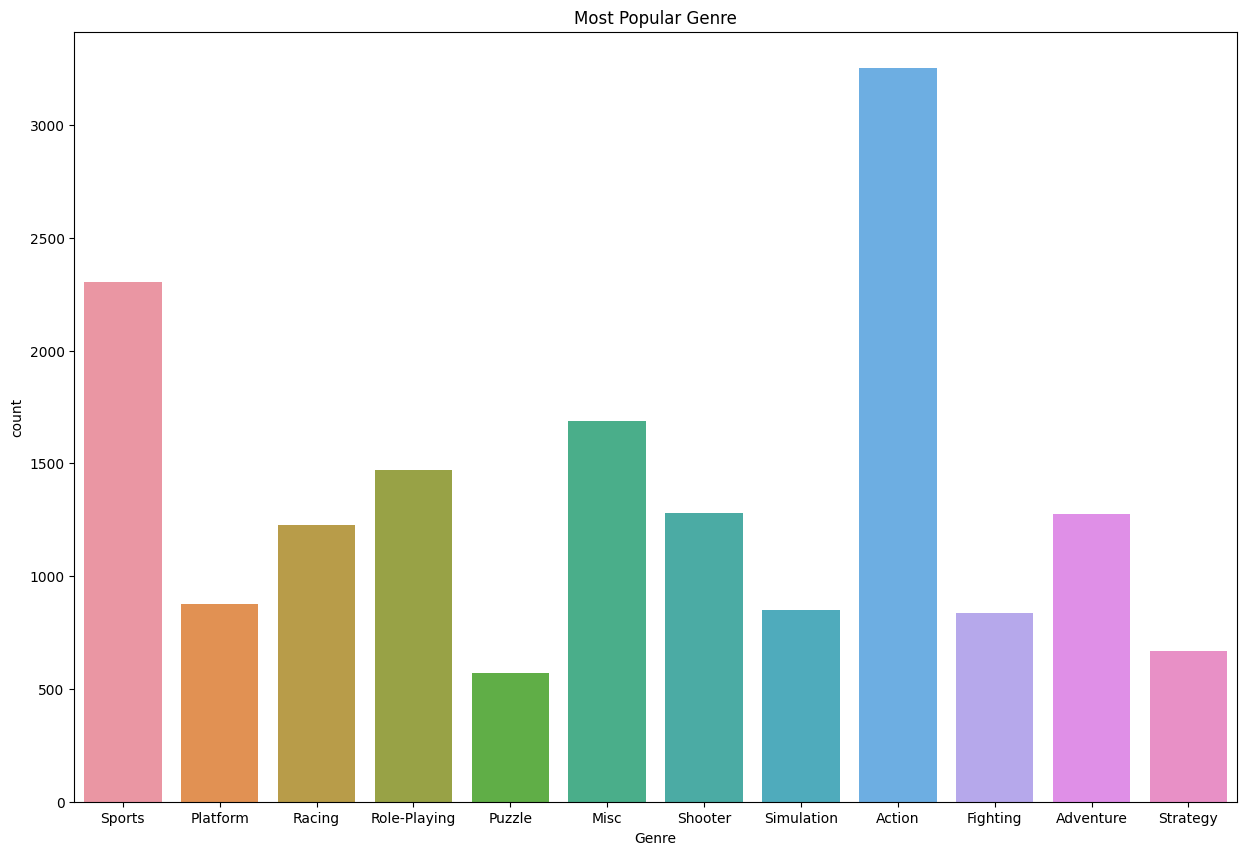

In [14]:
#Finding out the most popular genre
fig, plot1 = plt.subplots(figsize=(15, 10))
sns.countplot(x ='Genre', data =data2,ax=plot1).set_title("Most Popular Genre")

In [15]:
data2.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Text(0.5, 1.0, 'platforms vs the number of games released by them')

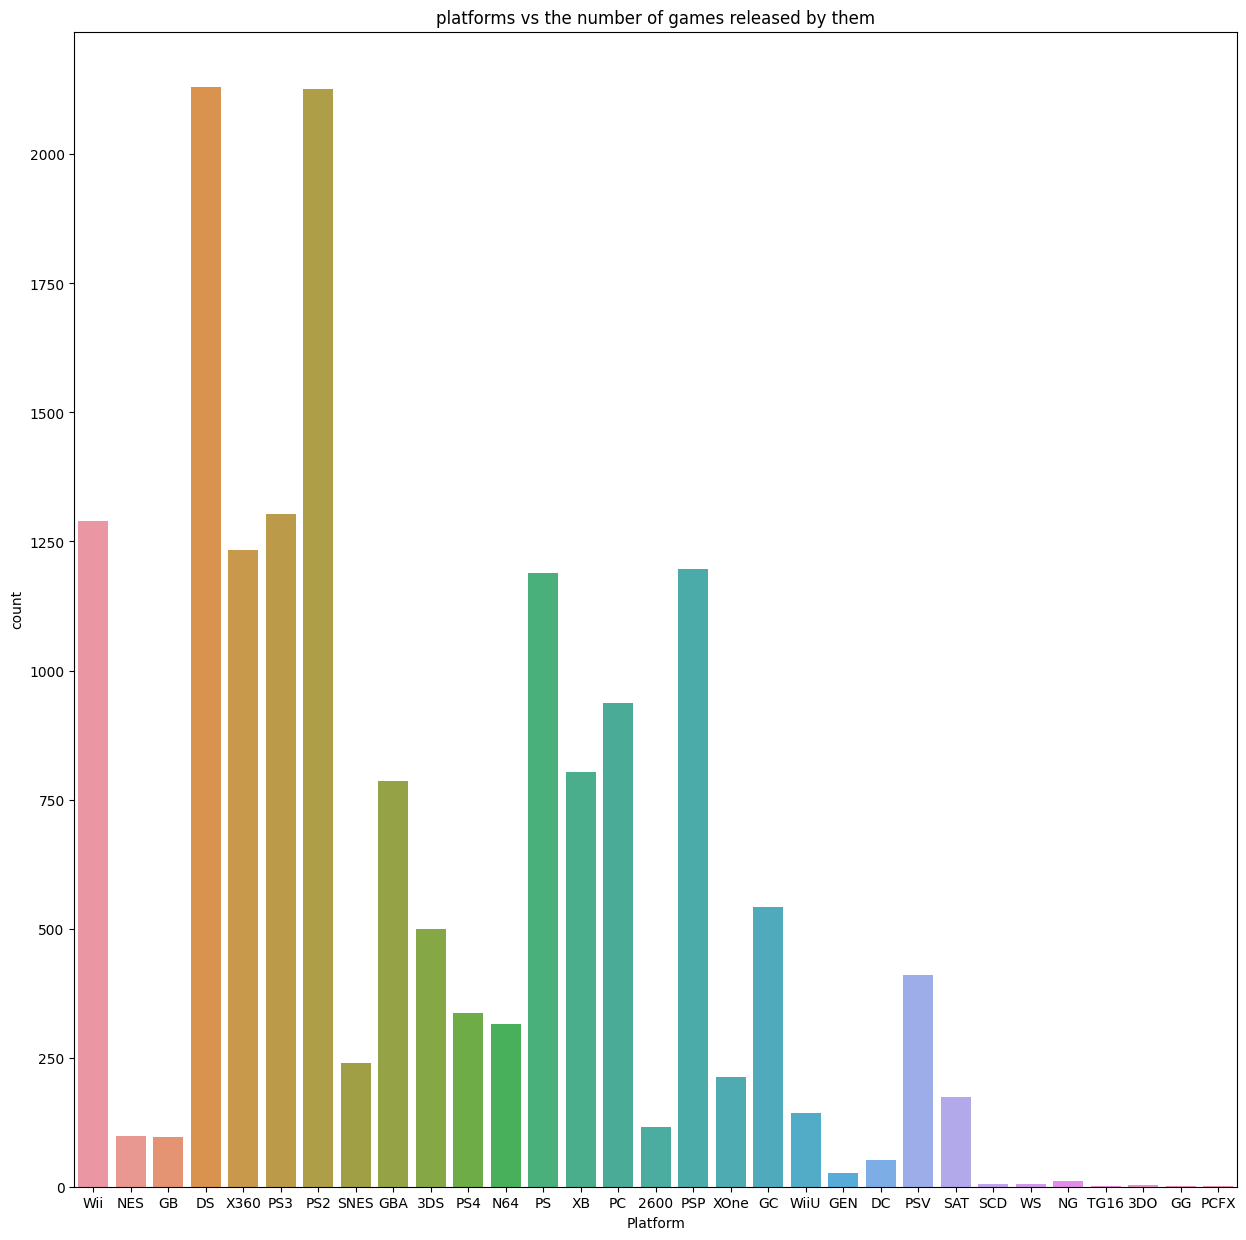

In [16]:
# which platform releases most games
fig,plot2=plt.subplots(figsize=(15, 15))
sns.countplot(x ='Platform', data =data2,ax=plot2).set_title("platforms vs the number of games released by them")

[Text(0.5, 1.0, 'Genre with highest global sales')]

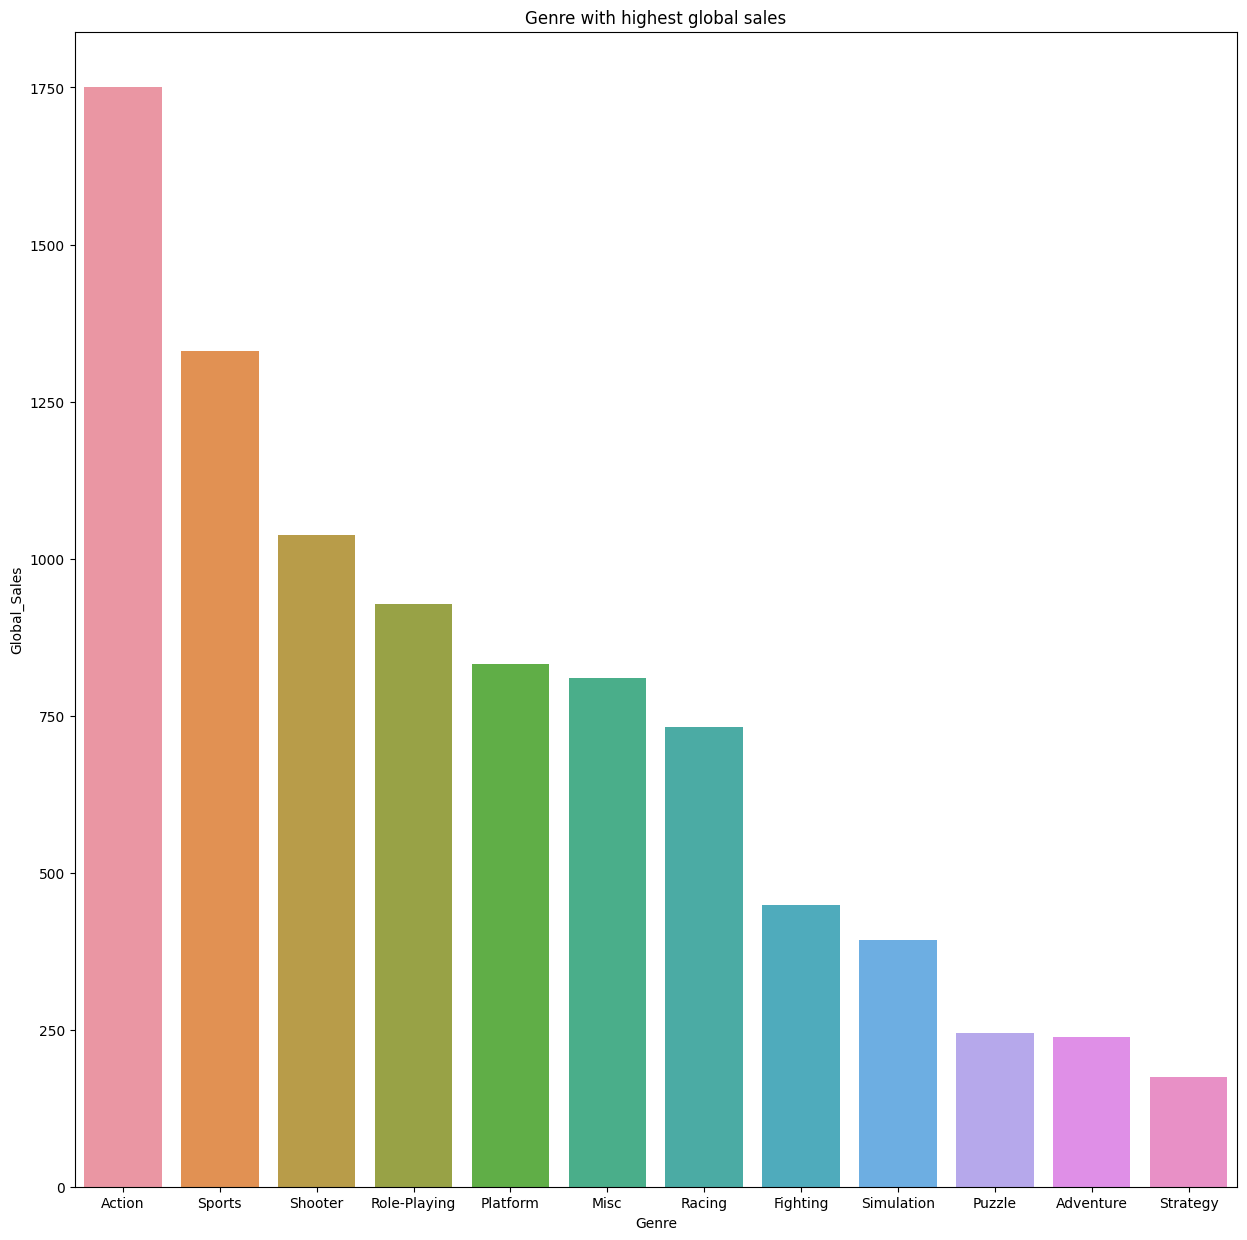

In [17]:
#Finding out the genre with the highest global sales

genrevsglobal=data1.groupby(["Genre"])["Global_Sales"].sum()
genrevsglobal=genrevsglobal.reset_index()
genrevsglobal=genrevsglobal.sort_values(by=["Global_Sales"],ascending=False)

plt.figure(figsize=(15, 15))
sns.barplot(x="Genre",y="Global_Sales",data=genrevsglobal).set(title=("Genre with highest global sales"))

Text(0.5, 1.0, 'Most Popular Genre')

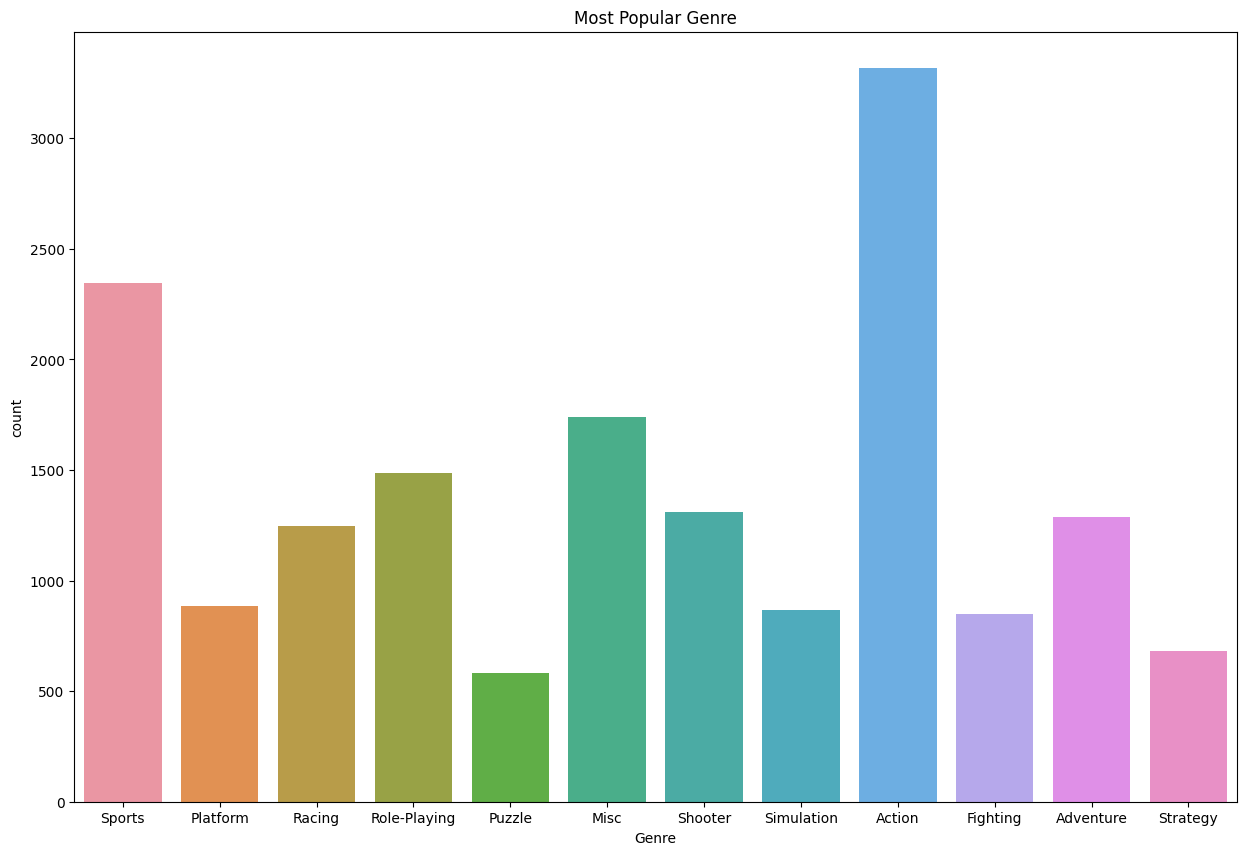

In [18]:
fig, plot1 = plt.subplots(figsize=(15, 10))
sns.countplot(x ='Genre', data =data1,ax=plot1).set_title("Most Popular Genre")

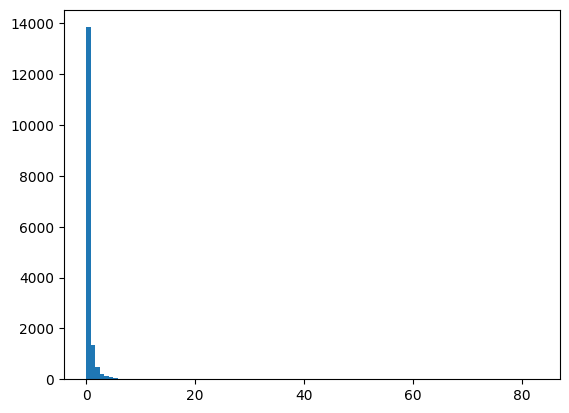

In [19]:
plt.hist(data2.Global_Sales,bins=100)
plt.show()

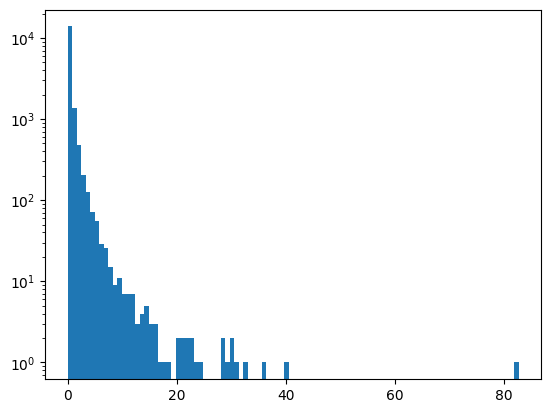

In [20]:
plt.hist(data2.Global_Sales,bins=100)
plt.yscale('log')
plt.show()

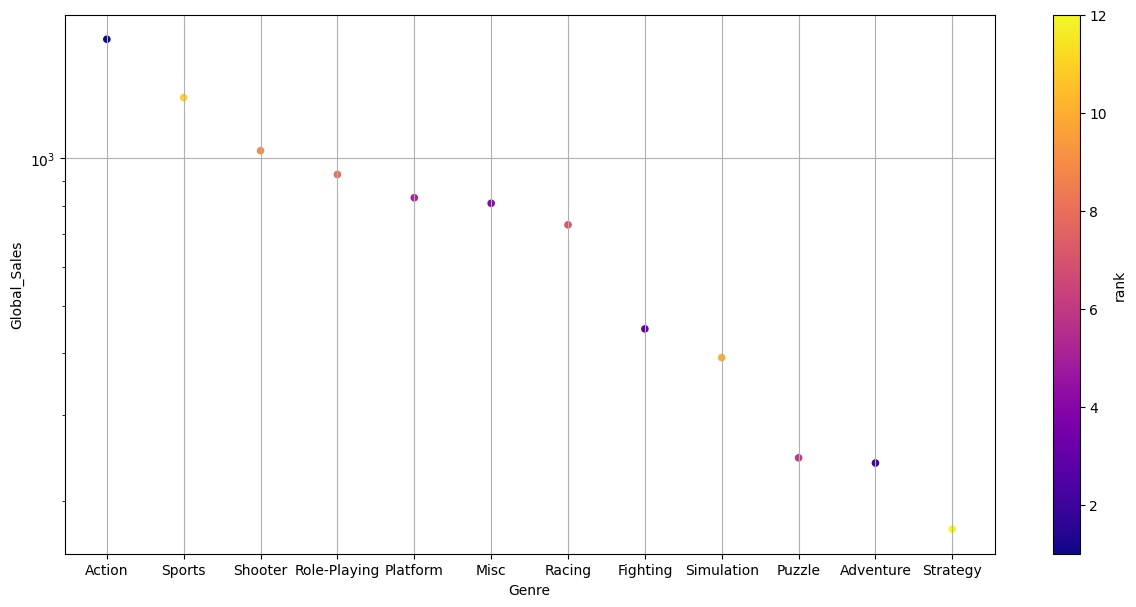

In [21]:
#global sales must be scaled inorder to make sense in the following plot
genrevsglobal['rank']=data2.Rank
genrevsglobal.plot(kind='scatter',x='Genre',y='Global_Sales',grid=True,c='rank',cmap='plasma',colorbar=True,legend=True,sharex=False,figsize=(15,7))
plt.yscale('log')
plt.show()

In [22]:
data3 = data2.drop(['JP_Sales','Other_Sales'],axis=1)

data3.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,31.37


In [23]:
rankglobal=data2[["Rank", "Global_Sales"]]
rankglobal=rankglobal.head(10)

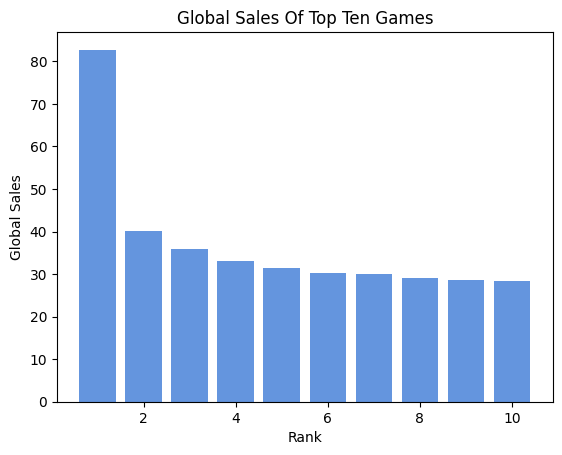

In [24]:
#Global Sales Of Top Ten Games 
plt.bar(rankglobal["Rank"],rankglobal["Global_Sales"],color="#6495DE")
plt.xlabel("Rank")
plt.ylabel("Global Sales")
plt.title("Global Sales Of Top Ten Games")
plt.show()

## Outlier Treatment ##

In [25]:
#The descriptive statistics of the output variable
data3['Global_Sales'].describe()

count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x22be5e49d50>,
 'caps': [<matplotlib.lines.Line2D at 0x22be5e4ae90>,
 'boxes': [<matplotlib.lines.Line2D at 0x22be29d4390>],
 'medians': [<matplotlib.lines.Line2D at 0x22be5e4bcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22be5e58510>],
 'means': []}

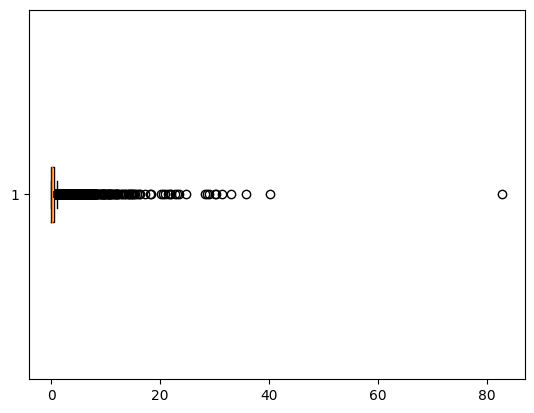

In [26]:
#Plotting boxplot of Global_Sales
plt.boxplot(data3['Global_Sales'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x22be5e92410>,
 'caps': [<matplotlib.lines.Line2D at 0x22be5e93710>,
 'boxes': [<matplotlib.lines.Line2D at 0x22be5e91a90>],
 'medians': [<matplotlib.lines.Line2D at 0x22be5e9c810>],
 'fliers': [<matplotlib.lines.Line2D at 0x22be5e9d090>],
 'means': []}

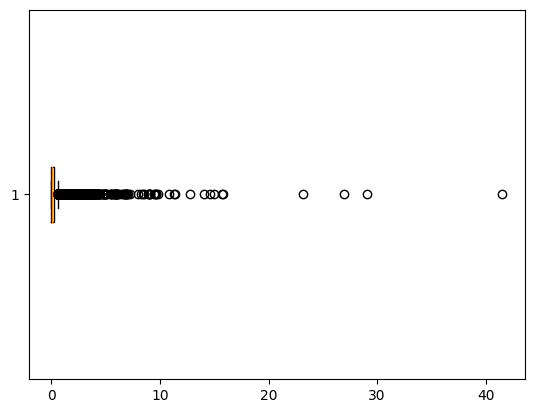

In [27]:
plt.boxplot(data3['NA_Sales'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x22bcec84f10>,
 'caps': [<matplotlib.lines.Line2D at 0x22bcec860d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22bcec84750>],
 'medians': [<matplotlib.lines.Line2D at 0x22bcec87050>],
 'fliers': [<matplotlib.lines.Line2D at 0x22be5e9f810>],
 'means': []}

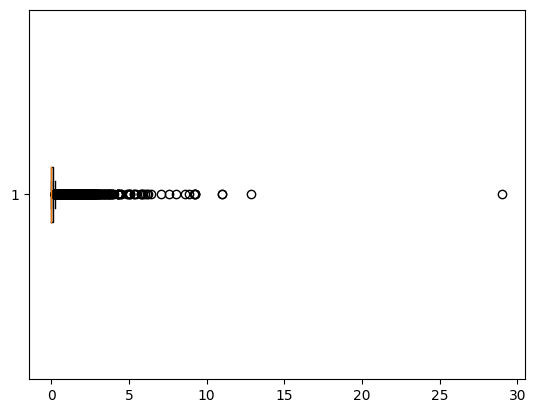

In [28]:
plt.boxplot(data2['EU_Sales'],vert=False)

In [29]:
#Calculating the upper and the lower limits

percentile25=data2['Global_Sales'].quantile(0.25)
percentile75=data2['Global_Sales'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit_gs=percentile75+1.5*iqr
lower_limit_gs=percentile25+1.5*iqr

In [30]:
percentile25=data2['NA_Sales'].quantile(0.25)
percentile75=data2['NA_Sales'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit_NA=percentile75+1.5*iqr
lower_limit_NA=percentile25+1.5*iqr

In [31]:
Percentile25=data1['EU_Sales'].quantile(0.25)
percentile75=data1['EU_Sales'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit_EU=percentile75+1.5*iqr
lower_limit_EU=percentile25+1.5*iqr

In [32]:
data3[data3['Global_Sales']>upper_limit_gs] #data with global sales greater than the upper limit

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,31.37
...,...,...,...,...,...,...,...,...,...
1842,1844,Need for Speed: ProStreet,Wii,2007.0,Racing,Electronic Arts,0.54,0.46,1.11
1843,1845,Pikmin 3,WiiU,2013.0,Strategy,Nintendo,0.45,0.31,1.11
1844,1846,Legend of Mana,PS,1999.0,Role-Playing,SquareSoft,0.18,0.13,1.11
1845,1847,Lumines: Puzzle Fusion,PSP,2004.0,Puzzle,Ubisoft,0.52,0.35,1.11


In [33]:
data3[data3['Global_Sales']<lower_limit_gs] #data with global sales lower than the lower limit

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
2970,2972,Baldur's Gate: Dark Alliance II,PS2,2004.0,Role-Playing,Interplay,0.34,0.26,0.68
2971,2973,Shark Tale,GBA,2004.0,Action,Activision,0.49,0.18,0.68
2972,2974,Plants vs. Zombies: Garden Warfare,XOne,2014.0,Shooter,Electronic Arts,0.39,0.23,0.68
2973,2975,Kirby's Dream Collection: Special Edition,Wii,2012.0,Action,Nintendo,0.34,0.00,0.68
2974,2976,Bakugan: Battle Brawlers,Wii,2009.0,Action,Activision,0.60,0.03,0.68
...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.01


In [34]:
#data without outliers

new_data1=data3[data3['Global_Sales'].between(lower_limit_gs,upper_limit_gs)]
new_data1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
1847,1849,Guitar Hero 5,PS3,2009.0,Misc,Activision,0.53,0.40,1.10
1848,1850,Megamania,2600,1981.0,Shooter,Activision,1.03,0.06,1.10
1849,1851,Medal of Honor: Airborne,X360,2007.0,Shooter,Electronic Arts,0.45,0.53,1.10
1850,1852,The Legend of Zelda: Tri Force Heroes,3DS,2015.0,Action,Nintendo,0.52,0.33,1.10
1851,1853,Jungle Hunt,2600,1982.0,Platform,Atari,1.03,0.06,1.10
...,...,...,...,...,...,...,...,...,...
2965,2967,Nintendo Presents: New Style Boutique 2 - Fash...,3DS,2015.0,Misc,Nintendo,0.01,0.61,0.69
2966,2968,MX vs. ATV Untamed,X360,2007.0,Racing,THQ,0.55,0.08,0.69
2967,2969,The Last Remnant,X360,2008.0,Role-Playing,Square Enix,0.25,0.20,0.69
2968,2970,Frozen: Olaf's Quest,DS,2013.0,Platform,Disney Interactive Studios,0.28,0.35,0.69


In [35]:
new_data1=new_data1[new_data1['NA_Sales'].between(lower_limit_NA,upper_limit_NA)]
new_data1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
1847,1849,Guitar Hero 5,PS3,2009.0,Misc,Activision,0.53,0.40,1.10
1849,1851,Medal of Honor: Airborne,X360,2007.0,Shooter,Electronic Arts,0.45,0.53,1.10
1850,1852,The Legend of Zelda: Tri Force Heroes,3DS,2015.0,Action,Nintendo,0.52,0.33,1.10
1853,1855,LEGO The Lord of the Rings,PS3,2012.0,Action,Warner Bros. Interactive Entertainment,0.36,0.53,1.10
1854,1856,Petz Dogz 2,DS,2007.0,Simulation,Ubisoft,0.47,0.52,1.10
...,...,...,...,...,...,...,...,...,...
2958,2960,NFL Xtreme,PS,1998.0,Sports,Sony Computer Entertainment,0.38,0.26,0.69
2959,2961,The Sly Collection,PS3,2010.0,Platform,Sony Computer Entertainment,0.52,0.09,0.69
2962,2964,Harry Potter and the Chamber of Secrets,GC,2002.0,Action,Electronic Arts,0.53,0.14,0.69
2964,2966,The Lord of the Rings: The Return of the King,GC,2003.0,Action,Electronic Arts,0.53,0.14,0.69


In [36]:
new_data1=new_data1[new_data1['EU_Sales'].between(lower_limit_EU,upper_limit_EU)]
new_data1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
1866,1868,Tales of Symphonia,GC,2003.0,Role-Playing,Nintendo,0.54,0.21,1.10
2001,2003,Bomberman 64,N64,1997.0,Puzzle,Hudson Soft,0.50,0.20,1.04
2074,2076,Rocksmith 2014,PS3,2013.0,Misc,Ubisoft,0.51,0.27,1.00
2107,2109,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.49,0.26,0.98
2109,2111,Mario Party Advance,GBA,2005.0,Misc,Nintendo,0.50,0.19,0.98
...,...,...,...,...,...,...,...,...,...
2943,2945,X-Men Origins: Wolverine - Uncaged Edition,X360,2009.0,Action,Activision,0.42,0.21,0.69
2945,2947,Disney Tangled,Wii,2010.0,Action,Disney Interactive Studios,0.47,0.17,0.69
2948,2950,Moto Racer 2,PS,1997.0,Racing,Electronic Arts,0.39,0.26,0.69
2954,2956,Mario Pinball Land,GBA,2004.0,Misc,Nintendo,0.50,0.18,0.69


{'whiskers': [<matplotlib.lines.Line2D at 0x22bced00e90>,
 'caps': [<matplotlib.lines.Line2D at 0x22bced022d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22bced00450>],
 'medians': [<matplotlib.lines.Line2D at 0x22bced03250>],
 'fliers': [<matplotlib.lines.Line2D at 0x22bced03a90>],
 'means': []}

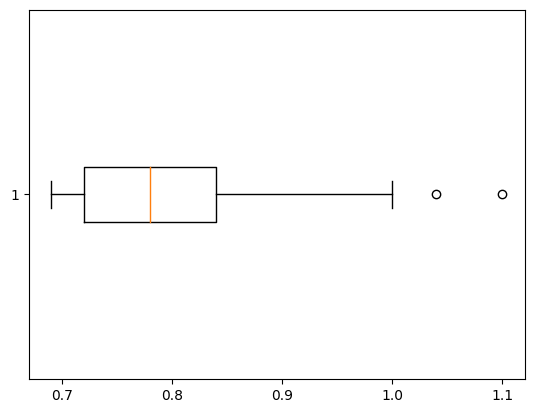

In [37]:
#boxplot of the new data global sales 
plt.boxplot(new_data1['Global_Sales'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x22bced52990>,
 'caps': [<matplotlib.lines.Line2D at 0x22bced53b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x22bced52050>],
 'medians': [<matplotlib.lines.Line2D at 0x22bced649d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22bceccf690>],
 'means': []}

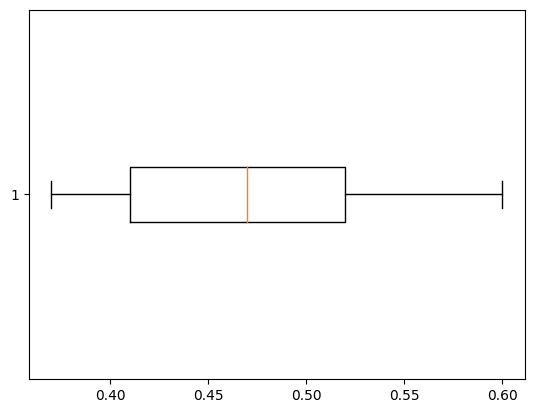

In [38]:
plt.boxplot(new_data1['NA_Sales'],vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x22be4fdcc90>,
 'caps': [<matplotlib.lines.Line2D at 0x22be4fddf50>,
 'boxes': [<matplotlib.lines.Line2D at 0x22be4fdc490>],
 'medians': [<matplotlib.lines.Line2D at 0x22be4fdee50>],
 'fliers': [<matplotlib.lines.Line2D at 0x22be5eaf650>],
 'means': []}

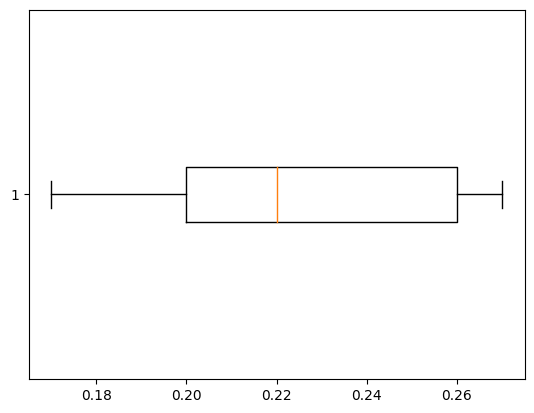

In [39]:
plt.boxplot(new_data1['EU_Sales'],vert=False)

In [40]:
new_data1.describe()

,Rank,Year,NA_Sales,EU_Sales,Global_Sales
count,127.000000,127.000000,127.000000,127.000000,127.000000
mean,2618.881890,2007.236220,0.468268,0.225433,0.795118
std,250.495117,5.005484,0.065551,0.032361,0.086491
min,1868.000000,1996.000000,0.370000,0.170000,0.690000
25%,2461.500000,2004.000000,0.410000,0.200000,0.720000
50%,2648.000000,2009.000000,0.470000,0.220000,0.780000
75%,2840.000000,2011.000000,0.520000,0.260000,0.840000
max,2960.000000,2016.000000,0.600000,0.270000,1.100000


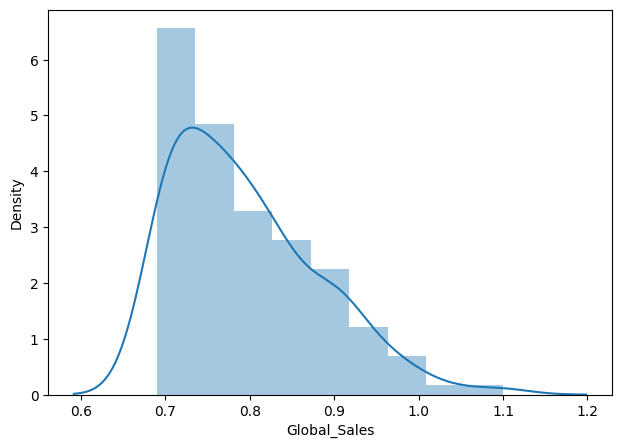

In [41]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_data1['Global_Sales'])

plt.show()

In [42]:
#Highest and lowest values of the global sales in new data
upper_limit = new_data1['Global_Sales'].mean() + 3*new_data1['Global_Sales'].std()#Appling capping
lower_limit = new_data1['Global_Sales'].mean() - 3*new_data1['Global_Sales'].std()

print("Highest allowed",upper_limit) 
print("Lowest allowed",lower_limit)

Highest allowed 1.0545919223398776
Lowest allowed 0.5356442981325631


In [43]:
df= new_data1[(new_data1['Global_Sales'] > 0.506211875265101) | (new_data1['Global_Sales'] <1.240704345768767)]

## Winzorisation ##

In [44]:
new_data1['Global_Sales'] = np.where(
    new_data1['Global_Sales'] > upper_limit_gs,
    upper_limit_gs,
    np.where(
        new_data1['Global_Sales'] < lower_limit_gs,
        lower_limit_gs,
        new_data1['Global_Sales']
    )
)

In [45]:
new_data1['NA_Sales'] = np.where(
    new_data1['NA_Sales'] > upper_limit_NA,
    upper_limit_NA,
    np.where(
        new_data1['NA_Sales'] < lower_limit_NA,
        lower_limit_NA,
        new_data1['NA_Sales']
    )
)

In [46]:
new_data1['EU_Sales'] = np.where(
    new_data1['EU_Sales'] > upper_limit_EU,
    upper_limit_NA,
    np.where(
        new_data1['EU_Sales'] < lower_limit_EU,
        lower_limit_EU,
        new_data1['EU_Sales']
    )
)

In [47]:
new_data1.describe()

,Rank,Year,NA_Sales,EU_Sales,Global_Sales
count,127.000000,127.000000,127.000000,127.000000,127.000000
mean,2618.881890,2007.236220,0.468268,0.225433,0.795118
std,250.495117,5.005484,0.065551,0.032361,0.086491
min,1868.000000,1996.000000,0.370000,0.170000,0.690000
25%,2461.500000,2004.000000,0.410000,0.200000,0.720000
50%,2648.000000,2009.000000,0.470000,0.220000,0.780000
75%,2840.000000,2011.000000,0.520000,0.260000,0.840000
max,2960.000000,2016.000000,0.600000,0.270000,1.100000


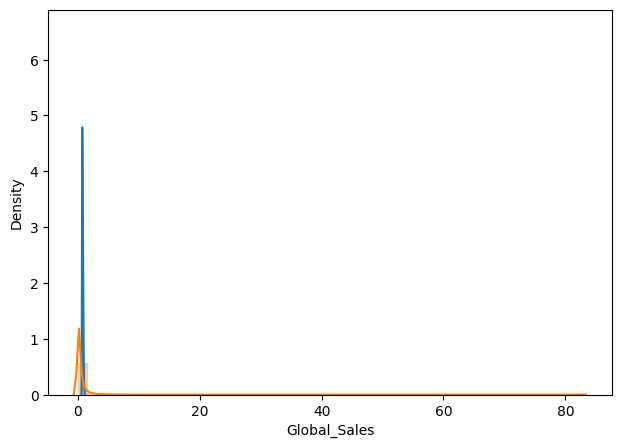

In [48]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_data1['Global_Sales'])
sns.distplot(data1['Global_Sales'])
plt.show()
#no change in plot 

## Encoding ##

In [49]:
## Taking a look at the unique values in the column
new_data1['Platform'].unique()

array(['GC', 'N64', 'PS3', 'Wii', 'GBA', 'PS2', '3DS', 'X360', 'WiiU',
       'PSP', 'DS', 'XOne', 'PSV', 'PS', 'XB'], dtype=object)

In [50]:
new_data1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
1866,1868,Tales of Symphonia,GC,2003.0,Role-Playing,Nintendo,0.54,0.21,1.10
2001,2003,Bomberman 64,N64,1997.0,Puzzle,Hudson Soft,0.50,0.20,1.04
2074,2076,Rocksmith 2014,PS3,2013.0,Misc,Ubisoft,0.51,0.27,1.00
2107,2109,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.49,0.26,0.98
2109,2111,Mario Party Advance,GBA,2005.0,Misc,Nintendo,0.50,0.19,0.98


In [51]:
new_data1['Publisher'].unique()

array(['Nintendo', 'Hudson Soft', 'Ubisoft',
       'Sony Computer Entertainment', 'Sega', 'Namco Bandai Games', 'THQ',
       'Microsoft Game Studios', 'Marvelous Entertainment', 'Activision',
       'Electronic Arts', 'Konami Digital Entertainment', 'Atari',
       'Disney Interactive Studios', 'Capcom', 'Take-Two Interactive',
       'Koch Media', 'LucasArts', 'Avanquest Software', 'Deep Silver',
       'Vivendi Games', 'Warner Bros. Interactive Entertainment',
       'Touchstone', 'GT Interactive', 'Eidos Interactive',
       'Acclaim Entertainment', 'LEGO Media', 'Hasbro Interactive',
       'SouthPeak Games', 'Virgin Interactive', 'Majesco Entertainment'],
      dtype=object)

In [52]:
new_data1['Genre'].unique()

array(['Role-Playing', 'Puzzle', 'Misc', 'Strategy', 'Shooter', 'Action',
       'Fighting', 'Racing', 'Sports', 'Platform', 'Adventure',
       'Simulation'], dtype=object)

In [53]:
new_data1['Publisher'].value_counts()

Publisher
Electronic Arts                           17
Activision                                16
Nintendo                                  13
THQ                                       10
Take-Two Interactive                       7
Namco Bandai Games                         6
Disney Interactive Studios                 6
Ubisoft                                    5
Capcom                                     5
Microsoft Game Studios                     5
Konami Digital Entertainment               4
Atari                                      4
Warner Bros. Interactive Entertainment     4
Sony Computer Entertainment                3
Sega                                       3
GT Interactive                             2
LucasArts                                  2
Acclaim Entertainment                      2
Virgin Interactive                         1
SouthPeak Games                            1
Hasbro Interactive                         1
LEGO Media                                 1


In [54]:
counts= new_data1['Publisher'].value_counts()
new_data1['Publisher'] = new_data1['Publisher'].apply(lambda x:'Small Publisher' if counts[x]<50 else x) #taking all small publishers and combine them

In [55]:
onehot_columns = ['Platform', 'Genre', 'Publisher']

In [56]:
def onehot_encode(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column])
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data

In [57]:
new_data2 = onehot_encode(new_data1, onehot_columns)

In [58]:
new_data2.head()

,Rank,Name,Year,NA_Sales,EU_Sales,Global_Sales,3DS,DS,GBA,GC,...,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Small Publisher
1866,1868,Tales of Symphonia,2003.0,0.54,0.21,1.10,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2001,2003,Bomberman 64,1997.0,0.50,0.20,1.04,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2074,2076,Rocksmith 2014,2013.0,0.51,0.27,1.00,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2107,2109,Xenoblade Chronicles,2010.0,0.49,0.26,0.98,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2109,2111,Mario Party Advance,2005.0,0.50,0.19,0.98,False,False,True,False,...,True,False,False,False,False,False,False,False,False,True


In [59]:
new_data2.isnull().sum()

Rank               0
Name               0
Year               0
NA_Sales           0
EU_Sales           0
Global_Sales       0
3DS                0
DS                 0
GBA                0
GC                 0
N64                0
PS                 0
PS2                0
PS3                0
PSP                0
PSV                0
Wii                0
WiiU               0
X360               0
XB                 0
XOne               0
Action             0
Adventure          0
Fighting           0
Misc               0
Platform           0
Puzzle             0
Racing             0
Role-Playing       0
Shooter            0
Simulation         0
Sports             0
Strategy           0
Small Publisher    0
dtype: int64

## Scaling ##

In [60]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [61]:
y = new_data2['Global_Sales'] #splitting y (output variable) from the data
x = new_data2.drop(['Global_Sales','Name'], axis=1) #splitting our data into x and y
x

,Rank,Year,NA_Sales,EU_Sales,3DS,DS,GBA,GC,N64,PS,...,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Small Publisher
1866,1868,2003.0,0.54,0.21,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2001,2003,1997.0,0.50,0.20,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
2074,2076,2013.0,0.51,0.27,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2107,2109,2010.0,0.49,0.26,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2109,2111,2005.0,0.50,0.19,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,2945,2009.0,0.42,0.21,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2945,2947,2010.0,0.47,0.17,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2948,2950,1997.0,0.39,0.26,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2954,2956,2004.0,0.50,0.18,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [62]:
Y = norm_func(y)
Y.describe()

count    127.000000
mean       0.256386
std        0.210954
min        0.000000
25%        0.073171
50%        0.219512
75%        0.365854
max        1.000000
Name: Global_Sales, dtype: float64

In [63]:
x=x.astype(np.float32)
X = norm_func(x)
X.describe()

,Rank,Year,NA_Sales,EU_Sales,3DS,DS,GBA,GC,N64,PS,...,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Small Publisher
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,...,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,0.0
mean,0.687621,0.561811,0.427251,0.554331,0.031496,0.055118,0.149606,0.007874,0.031496,0.102362,...,0.110236,0.047244,0.015748,0.039370,0.078740,0.125984,0.031496,0.110236,0.047244,NaN
std,0.229391,0.250274,0.285006,0.323610,0.175346,0.229114,0.358098,0.088736,0.175346,0.304325,...,0.314424,0.213001,0.124992,0.195244,0.270399,0.333146,0.175346,0.314424,0.213001,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.543498,0.400000,0.173913,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.714286,0.650000,0.434783,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.890110,0.750000,0.652174,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [64]:
X['Small Publisher'] = X['Small Publisher'].fillna(0)
X.isnull().sum()


Rank               0
Year               0
NA_Sales           0
EU_Sales           0
3DS                0
DS                 0
GBA                0
GC                 0
N64                0
PS                 0
PS2                0
PS3                0
PSP                0
PSV                0
Wii                0
WiiU               0
X360               0
XB                 0
XOne               0
Action             0
Adventure          0
Fighting           0
Misc               0
Platform           0
Puzzle             0
Racing             0
Role-Playing       0
Shooter            0
Simulation         0
Sports             0
Strategy           0
Small Publisher    0
dtype: int64

## Model Building

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [66]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lnr_clf = LinearRegression()
lnr_clf.fit(X_train,y_train)
predictions_LR = lnr_clf.predict(X_test)
print(predictions_LR)


[ 0.4458204   0.02040106  0.14120054  0.26020622  0.3543523   0.16980857
  0.15098542 -0.01479965  0.00992805  0.21627933  0.29673165  0.68099165
  0.4839284   0.08540636  0.36583257  0.09066284  0.48648557 -0.01452595
  0.5322372   0.35417384  0.5478883   0.04927397  0.03389543  0.15434515
  0.88214934  0.150038  ]


In [67]:
lnr_clf.score(X_test,y_test)

0.9806804145425401

In [68]:
# using K Fold cross validation to measure the accuracy of the LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=52)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.98996352, 0.98655348, 0.98671876, 0.98394941, 0.98658497])

In [69]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.986152,{'fit_intercept': True}
1,lasso,-0.133230,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.994488,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [70]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

RF_regressor = RandomForestRegressor(n_estimators=300, random_state=5)
RF_regressor.fit(X_train, y_train)
predictions_RF = RF_regressor.predict(X_test)
predictions_RF

array([0.41325203, 0.02398374, 0.14642276, 0.25073171, 0.32422764,
       0.07463415, 0.14658537, 0.00146341, 0.02398374, 0.22252033,
       0.28406504, 0.70894309, 0.49292683, 0.07398374, 0.3396748 ,
       0.07373984, 0.4901626 , 0.00634146, 0.57739837, 0.33837398,
       0.57260163, 0.06520325, 0.04934959, 0.14666667, 0.74747967,
       0.14658537])

In [71]:
RF_regressor.score(X_test,y_test)

0.957965050351189

In [72]:
cv2 = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=52)
cross_val_score(RandomForestRegressor(), X, y, cv=cv2)

array([0.99801101, 0.95995188, 0.97943485, 0.94844723, 0.99866725])

## Conclusion

In [73]:
# Decision Tree is the best model with 99.39% accuracy